In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import exposure
from skimage import feature

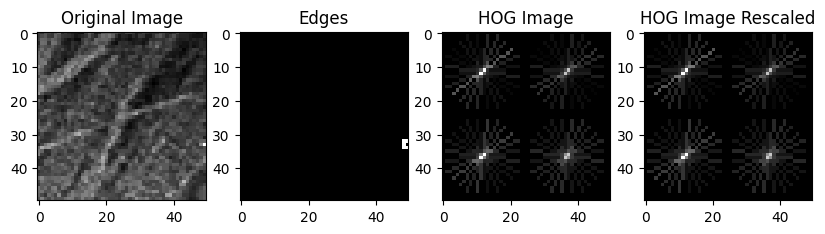

(48,)


In [4]:
imgDir= "./pictures/15.png"

grid_q= 2

# Load an image
img = cv2.imread(imgDir, cv2.IMREAD_GRAYSCALE)

# Compute edges using Canny edge detection
edges = cv2.Canny(img, 100, 200)

# Compute HOG features using skimage.feature.hog
hog_features, hog_image = hog(img, orientations= 12, pixels_per_cell= (int(img.shape[0]/grid_q), int(img.shape[1]/grid_q)),
                    cells_per_block=(1, 1), visualize=True, feature_vector= True)

# Rescale HOG image to enhance visibility
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range= (0, 10))

# Display the original image, edges and HOG image
plt.figure(figsize=(10,10))

plt.subplot(141)
plt.imshow(img, cmap= "gray")
plt.title("Original Image")

plt.subplot(142)
plt.imshow(edges, cmap='gray')
plt.title("Edges")

plt.subplot(143)
plt.imshow(hog_image, cmap='gray')
plt.title("HOG Image")

plt.subplot(144)
plt.imshow(hog_image_rescaled, cmap='gray')
plt.title("HOG Image Rescaled")

plt.show()

print(hog_features.shape)

In [13]:
def get_feature_vector(image_directory, grid_q= 4, orientation= 8, ):
    img = cv2.imread(image_directory, cv2.IMREAD_GRAYSCALE)

    hog_features = hog(img, orientations= 8, pixels_per_cell= (int(img.shape[0]/grid_q), int(img.shape[1]/grid_q)),
                    cells_per_block=(1, 1), feature_vector= True)

    return hog_features

import os

# pictures_directory_list= np.zeros(0, dtype= "str")
# for (root, dirs, file) in os.walk("./pictures/"):
#     for img in file:
#         if '.png' in f:
#             pictures_directory_list= np.append(pictures_directory_list, img)


feature_matrix= []

for i in range(1, 839):
    img_dir= "./pictures/" + str(i) + ".png"
    feature_vec= get_feature_vector(img_dir, grid_q= 2)
    feature_matrix.append(feature_vec)

feature_matrix= np.array(feature_matrix)
print(feature_matrix.shape)

np.savetxt('featurematrix2.csv', feature_matrix, delimiter=',')

(838, 32)


In [12]:
print(sum(sum(feature_matrix== 0))/feature_matrix.size)
feature_matrix.shape

0.0815557875894988


(838, 32)